# Quantifying implicit associations among words using word embeddings

Chung-hong Chan (GESIS)

## Empowerment statement

In this Methods Hub entry, I am going to show you how to test for
implicit associations using word embeddings trained on a large language
corpus.

## Required R packages

The following R packages are required:

In [ ]:
require(quanteda)
require(lsa)
require(rsparse)
require(sweater)

## Cosine distance

Suppose we have the following corpus of 10 documents:

**Doc 1**: berlin is the capital of germany

**Doc 2**: paris is the capital of france

**Doc 3**: tokyo is the capital of japan

**Doc 4**: the cat is weird

**Doc 5**: berlin

**Doc 6**: paris is nice

**Doc 7**: paris is nice

**Doc 8**: paris is nice

**Doc 9**: paris is nice

**Doc 10**: berlin is weird

The unique token types are: “berlin”, “is”, “the”, “capital”, “of”,
“germany”, “paris”, “france”, “tokyo”, “japan”, “cat”, “weird”, “nice”.
The representation of the above corpus as a document-term matrix is:

|     | berlin | is  | the | capital | of  | germany | paris | france | tokyo | japan | cat | weird | nice |
|----|-------|----|-----|-------|----|-------|------|-------|------|------|-----|------|-----|
| 1   | 1      | 1   | 1   | 1       | 1   | 1       | 0     | 0      | 0     | 0     | 0   | 0     | 0    |
| 2   | 0      | 1   | 1   | 1       | 1   | 0       | 1     | 1      | 0     | 0     | 0   | 0     | 0    |
| 3   | 0      | 1   | 1   | 1       | 1   | 0       | 0     | 0      | 1     | 1     | 0   | 0     | 0    |
| 4   | 0      | 1   | 1   | 0       | 0   | 0       | 0     | 0      | 0     | 0     | 1   | 1     | 0    |
| 5   | 1      | 0   | 0   | 0       | 0   | 0       | 0     | 0      | 0     | 0     | 0   | 0     | 0    |
| 6   | 0      | 1   | 0   | 0       | 0   | 0       | 1     | 0      | 0     | 0     | 0   | 0     | 1    |
| 7   | 0      | 1   | 0   | 0       | 0   | 0       | 1     | 0      | 0     | 0     | 0   | 0     | 1    |
| 8   | 0      | 1   | 0   | 0       | 0   | 0       | 1     | 0      | 0     | 0     | 0   | 0     | 1    |
| 9   | 0      | 1   | 0   | 0       | 0   | 0       | 1     | 0      | 0     | 0     | 0   | 0     | 1    |
| 10  | 1      | 1   | 0   | 0       | 0   | 0       | 0     | 0      | 0     | 0     | 0   | 1     | 0    |

The row vector is the vector representation of the document. One way to
compare the similarity between two **documents** is to calculate the
cosine similarity. Cosine similarity between two vectors ($\mathbf{A}$,
$\mathbf{B}$) is defined as:

$$
\cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|}
$$

For example, the cosine similarity between *Doc 1*
`[1,1,1,1,1,1,0,0,0,0,0,0,0]` and *Doc 2* `[0,1,1,1,1,0,1,1,0,0,0,0,0]`
is:

$$
\begin{aligned}
\mathbf{A} \cdot \mathbf{B} &= 1 \times 0 + 1 \times 1 + 1 \times 1 +1 \times 1 +1 \times 1 + 1 \times 0 + 0 \times 1 + 0 \times 1 + 0 \times 0 + 0 \times 0 + 0 \times 0 + 0 \times 0 + 0 \times 0 \\
&= 4\\
\|\mathbf{A}\| &= \sqrt{1^2 + 1^2 + 1^2 + 1^2 + 1^2 + 1^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2} \\
&= \sqrt{6}\\
\|\mathbf{B}\| &= \sqrt{0^2 + 1^2 + 1^2 + 1^2 + 1^2 + 0^2 + 1^2 + 1^2 + 0^2 + 0^2 + 0^2 + 0^2 + 0^2} \\
&= \sqrt{6}\\
\cos(\theta) &= { 4 \over \sqrt{6} \times \sqrt{6}}\\
&= 0.\overline{6}
\end{aligned}
$$

In R, `lsa` (Wild, 2022) can be used to calculate cosine similarity.

In [ ]:
library(lsa)
doc1 <- c(1,1,1,1,1,1,0,0,0,0,0,0,0)
doc2 <- c(0,1,1,1,1,0,1,1,0,0,0,0,0)
cosine(doc1, doc2)

          [,1]
[1,] 0.6666667

Or using `quanteda` (Benoit et al., 2018)

In [ ]:
library(quanteda)
docs <- c("berlin is the capital of germany",
          "paris is the capital of france",
          "tokyo is the capital of japan",
          "the cat is weird",
          "berlin",
          "paris is nice",
          "paris is nice",
          "paris is nice",
          "paris is nice",
          "berlin is weird")
docs_dtm <- corpus(docs) %>% tokens %>% dfm()
docs_dtm

Document-feature matrix of: 10 documents, 13 features (70.77% sparse) and 0 docvars.
       features
docs    berlin is the capital of germany paris france tokyo japan
  text1      1  1   1       1  1       1     0      0     0     0
  text2      0  1   1       1  1       0     1      1     0     0
  text3      0  1   1       1  1       0     0      0     1     1
  text4      0  1   1       0  0       0     0      0     0     0
  text5      1  0   0       0  0       0     0      0     0     0
  text6      0  1   0       0  0       0     1      0     0     0
[ reached max_ndoc ... 4 more documents, reached max_nfeat ... 3 more features ]

In [ ]:
cosine(as.vector(docs_dtm[1,]), as.vector(docs_dtm[2,]))

          [,1]
[1,] 0.6666667

The cosine similarity between *Doc 1* and *Doc 6* is much lower, as
there is just one common word *“is”*.

In [ ]:
doc6 <- c(0,1,0,0,0,0,1,0,0,0,0,0,1)
##or
##cosine(as.vector(docs_dtm[1,]), as.vector(docs_dtm[6,]))
cosine(doc1, doc6)

          [,1]
[1,] 0.2357023

## One-hot vectors

In the traditional “bag of words” text representation, a word is
presented as a so-called “one-hot” vector. In the above example, the
fifth document has just one word of “berlin”. This document is
represented as row vector `[1,0,0,0,0,0,0,0,0,0,0,0,0]` in the
document-term matrix. This vector is sparse (many zeros). One can also
reason it as the “one-hot” vector representation of the word “berlin”,
because there is exactly one instance of “1” in the entire vector.
One-hot vector representation of word is not very useful for comparison
between **words**. For example, cosine similarity of “one-hot” vectors
of two different words is always 0.

In [ ]:
## comparing "berlin" and "paris"
cosine(c(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       c(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0))

     [,1]
[1,]    0

     [,1]
[1,]    0

     [,1]
[1,]    0

     [,1]
[1,]    0

However, we should anticipate that “berlin” and “paris” should be more
similar in latent meaning (at least both of them are described in the
context of “capital”) than “berlin” and “cat”.

## (Dense) word vectors

An improvement to this is to make them “dense” word vectors. One way is
to train word embeddings on the corpus in order to generate dense word
vectors. Word embeddings can capture the **distributional semantics** of
words: words that are used and occur in the same contexts tend to
purport similar meanings.

In the following example, the GLoVe embeddings are trained (Pennington
et al., 2014). The GLoVe algorithm is based on the weighted
feature-cooccurrence matrix (FCM) representation of the corpus, which
can be generated by quanteda (Benoit et al., 2018).

There are three parameters needed to be specified: `WINDOWS_SIZE`,
`RANK`, `LEARNING_RATE`. `WINDOW_SIZE` determines how close two words
are is being considered as related. `RANK` determines the output length
of the word vector. `LEARNING_RATE` determines the learning rate of the
algorithm.

The FCM is a square matrix with each cell represents how likely two
words are cooccured.

In [ ]:
WINDOW_SIZE <- 3

weighted_fcm_corpus <- corpus(docs) %>% tokens() %>%
    fcm(window = WINDOW_SIZE, weights = 1 / seq_len(WINDOW_SIZE),
        count = "weighted", context = "window", tri = TRUE)
weighted_fcm_corpus

Feature co-occurrence matrix of: 13 by 13 features.
         features
features  berlin is the   capital  of   germany     paris    france     tokyo
  berlin       0  2 0.5 0.3333333 0   0         0         0         0        
  is           0  0 3.5 1.5000000 1.0 0         5.0000000 0         1.0000000
  the          0  0 0   3.0000000 1.5 0.3333333 0.5000000 0.3333333 0.5000000
  capital      0  0 0   0         3.0 0.5000000 0.3333333 0.5000000 0.3333333
  of           0  0 0   0         0   1.0000000 0         1.0000000 0        
  germany      0  0 0   0         0   0         0         0         0        
  paris        0  0 0   0         0   0         0         0         0        
  france       0  0 0   0         0   0         0         0         0        
  tokyo        0  0 0   0         0   0         0         0         0        
  japan        0  0 0   0         0   0         0         0         0        
         features
features      japan
  berlin  0        
  is      0   

In [ ]:
library(rsparse)

RANK <- 5
LEARNING_RATE <- 0.05

glove <- GloVe$new(rank = RANK, x_max = RANK / 2, learning_rate = LEARNING_RATE)

wv_main <- glove$fit_transform(weighted_fcm_corpus, n_iter = 100,
                               convergence_tol = 0.01, n_threads = 8)

wv_context <- glove$components
dense_vectors <- wv_main + t(wv_context)

The (dense) word vectors are, as the name suggested, dense. The
dimension is equal to `RANK`. We can also think about the following
matrix as a multidimensional *word embedding space*.

In [ ]:
dense_vectors

               [,1]        [,2]        [,3]       [,4]        [,5]
berlin   0.78093497  0.21943000 -0.06184041  0.4826452  0.18116239
is       1.06797239  1.04223992 -1.07510086 -0.1710641  0.80377360
the     -0.81053815  0.28407879 -1.18254362 -0.7054432 -0.14764230
capital -1.63767566  0.22032560 -1.01020617 -0.3420165 -0.57757420
of      -1.14865915 -0.32806516 -0.10464064  0.2914658 -0.09522144
germany  0.08748539  0.06579131  0.59776893  0.4546143  0.52612567
paris    1.57121831  0.60983331 -0.71209092  0.2564970  0.50354111
france   0.13385241  0.02386792  0.99771523  0.2197001  0.35186703
tokyo    0.30444173 -0.81186621  0.98766495  0.3769669  0.73225823
japan   -0.15810711 -0.01458546  0.89092855  0.3838428  0.02830720
cat      0.13005214 -0.21182661 -0.23096003  0.5567883 -0.25188778
weird    0.47085392  0.26200320  0.04344626 -0.2601290  0.24816990
nice     0.80941005  0.49620816  0.18861825 -0.2391569  0.60577248

And the row vectors can be compared using cosine similarity. Now, we can
see that the similarity between “berlin” and “paris” is higher than
“berlin” and “cat”.

In [ ]:
cosine(dense_vectors["berlin",], dense_vectors["paris",])

          [,1]
[1,] 0.8783095

         [,1]
[1,] 0.434429

## Target words and attribute words

Suppose “paris”, “tokyo”, and “berlin” are the words we are interested
in. We can called these words *target words*. We can determine how these
words are similar to some other words in the word embeddings space.
Suppose we set “nice” to be the attribute word. By determining the
similarities between the target words and attribute words, we can see
the implicit association between words. In this example, we can see that
“paris” is highly associated with “nice”; but not “tokyo” and “berlin”.

In [ ]:
cosine(dense_vectors["paris",], dense_vectors["nice",])

          [,1]
[1,] 0.7536537

          [,1]
[1,] 0.2118179

          [,1]
[1,] 0.6440085

## Pretrained word embeddings

We can train our own word embeddings. But there are also several
pretrained word embeddings trained on large corpora available for
download.

-   [word2vec](https://huggingface.co/fse/word2vec-google-news-300)
    trained on Google News
-   [GLoVe](https://nlp.stanford.edu/projects/glove/) trained on
    Wikipedia, Common Crawl, and Gigaword
-   [fastText](https://fasttext.cc/docs/en/crawl-vectors.html) trained
    on Wikipedia and Common Crawl

In the following example, we will use the pretrained GLoVe word
embeddings to replicate the findings by Caliskan et al. (2017) and
pretrained word2vec word embeddings to replicate the findings from Garg
et al. (2018). The R package `sweater` (Chan, 2022) can be used to read
the downloaded word embedding file.

``` r
library(sweater)
glove <- read_word2vec("glove.840B.300d.txt")
```

The package also provides a subset of the word embeddings called
`glove_math`.

## Query

`sweater` use the concept of query to look for associations.

A query requires two sets of words: Target words ($\mathcal{S}$,
$\mathcal{T}$) and Attribute words ($\mathcal{A}$, $\mathcal{B}$). The
package provides different methods and they require different
combinations of $\mathcal{S}$, $\mathcal{T}$, $\mathcal{A}$, and
$\mathcal{B}$.

| Method                           | Target words                 | Attribute words              |
|--------------------------|-----------------------|-----------------------|
| Mean Average Cosine Similarity   | $\mathcal{S}$                | $\mathcal{A}$                |
| Relative Norm Distance           | $\mathcal{S}$                | $\mathcal{A}$, $\mathcal{B}$ |
| Relative Negative Sentiment Bias | $\mathcal{S}$                | $\mathcal{A}$, $\mathcal{B}$ |
| SemAxis                          | $\mathcal{S}$                | $\mathcal{A}$, $\mathcal{B}$ |
| Normalized Association Score     | $\mathcal{S}$                | $\mathcal{A}$, $\mathcal{B}$ |
| Embedding Coherence Test         | $\mathcal{S}$                | $\mathcal{A}$, $\mathcal{B}$ |
| Word Embedding Association Test  | $\mathcal{S}$, $\mathcal{T}$ | $\mathcal{A}$, $\mathcal{B}$ |

All methods use the same `query` function.

``` r
query(w, S_words, T_words, A_words, B_words, method = "guess", verbose = FALSE)
```

## Case study: Gender biases in word embeddings

### Word Embedding Association Test

Word Embedding Association Test (WEAT) (Caliskan et al., 2017) requires
all four wordsets of $\mathcal{S}$, $\mathcal{T}$, $\mathcal{A}$, and
$\mathcal{B}$. The method is modeled after the Implicit Association Test
(IAT) and it measures the relative strength of $\mathcal{S}$’s
association with $\mathcal{A}$ to $\mathcal{B}$ against the same of
$\mathcal{T}$.

In [ ]:
require(sweater)
S <- c("math", "algebra", "geometry", "calculus", "equations", "computation",
       "numbers", "addition")
T <- c("poetry", "art", "dance", "literature", "novel", "symphony", "drama",
       "sculpture")
A <- c("male", "man", "boy", "brother", "he", "him", "his", "son")
B <- c("female", "woman", "girl", "sister", "she", "her", "hers", "daughter")
sw <- query(glove_math, S, T, A, B)
sw

── sweater object ──────────────────────────────────────────────────────────────

Test type:  weat 
Effect size:  1.055015 

── Functions ───────────────────────────────────────────────────────────────────

• `calculate_es()`: Calculate effect size

• `weat_resampling()`: Conduct statistical test

The effect size can be interpreted the same way as Cohen’s d. In this
case, the effect size is positive, indicating the math-related concepts
are more associated with male than female, whereas art-related concepts
are more associated with female than male.

### Relative Norm Distance

Garg et al. (2018) use Relative Norm Distance to quantify gender biases
of occupation words in the pretrained Google News Word Embeddings. The
method requires one set of target words and two sets of attribute words.

In [ ]:
S1 <- c("janitor", "statistician", "midwife", "bailiff", "auctioneer", 
"photographer", "geologist", "shoemaker", "athlete", "cashier", 
"dancer", "housekeeper", "accountant", "physicist", "gardener", 
"dentist", "weaver", "blacksmith", "psychologist", "supervisor", 
"mathematician", "surveyor", "tailor", "designer", "economist", 
"mechanic", "laborer", "postmaster", "broker", "chemist", "librarian", 
"attendant", "clerical", "musician", "porter", "scientist", "carpenter", 
"sailor", "instructor", "sheriff", "pilot", "inspector", "mason", 
"baker", "administrator", "architect", "collector", "operator", 
"surgeon", "driver", "painter", "conductor", "nurse", "cook", 
"engineer", "retired", "sales", "lawyer", "clergy", "physician", 
"farmer", "clerk", "manager", "guard", "artist", "smith", "official", 
"police", "doctor", "professor", "student", "judge", "teacher", 
"author", "secretary", "soldier")

A1 <- c("he", "son", "his", "him", "father", "man", "boy", "himself", 
"male", "brother", "sons", "fathers", "men", "boys", "males", 
"brothers", "uncle", "uncles", "nephew", "nephews")

B1 <- c("she", "daughter", "hers", "her", "mother", "woman", "girl", 
"herself", "female", "sister", "daughters", "mothers", "women", 
"girls", "females", "sisters", "aunt", "aunts", "niece", "nieces"
)
res <- query(googlenews, S_words = S1, A_words = A1, B_words = B1)
res

── sweater object ──────────────────────────────────────────────────────────────

Test type:  rnd 
Effect size:  -6.341598 

── Functions ───────────────────────────────────────────────────────────────────

• `calculate_es()`: Calculate effect size

• `plot()`: Plot the bias of each individual word

The more positive effect size indicates that words in $\mathcal{S}$ are
more associated with $\mathcal{B}$. As the effect size is negative, it
indicates that the concept of occupation is more associated with
$\mathcal{B}$, i.e. male.

We can also produce a visualization to study the differences among
target words. Target words such as “nurse”, “midwife”, and “housekeeper”
are more associated with female than male.

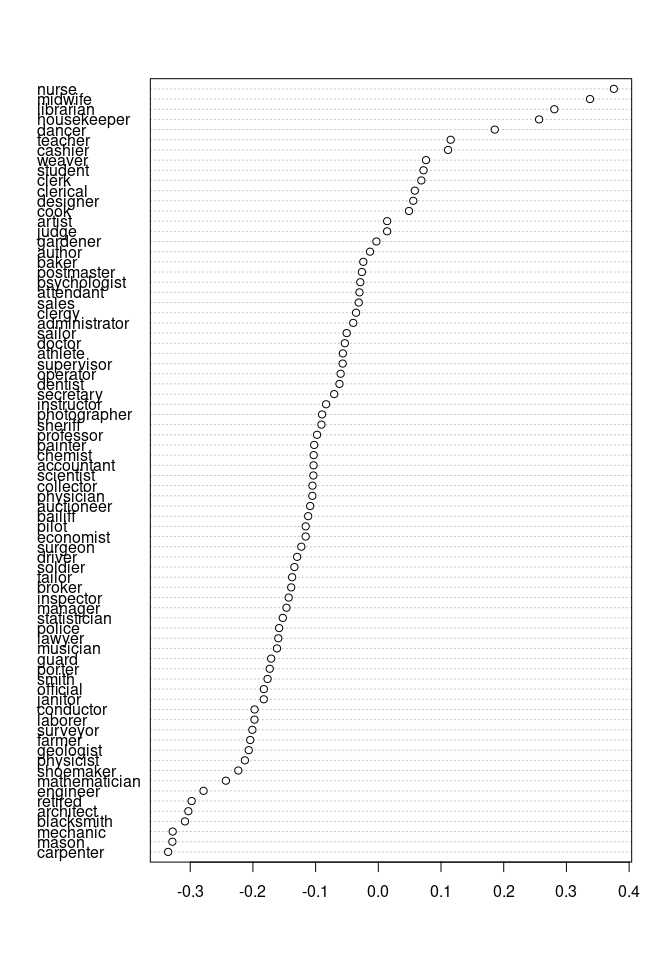

In [ ]:
plot(res)

## Conclusion

In this entry, I showed you how the quantification of implicit
association among words works. The R package `sweater` was introduced
for this task.

## References

Benoit, K., Watanabe, K., Wang, H., Nulty, P., Obeng, A., Müller, S., &
Matsuo, A. (2018). Quanteda: An R package for the quantitative analysis
of textual data. *Journal of Open Source Software*, *3*(30), 774.
<https://doi.org/10.21105/joss.00774>

Caliskan, A., Bryson, J. J., & Narayanan, A. (2017). Semantics derived
automatically from language corpora contain human-like biases.
*Science*, *356*(6334), 183–186.
<https://doi.org/10.1126/science.aal4230>

Chan, C. (2022). Sweater: Speedy word embedding association test and
extras using R. *Journal of Open Source Software*, *7*(72), 4036.
<https://doi.org/10.21105/joss.04036>

Garg, N., Schiebinger, L., Jurafsky, D., & Zou, J. (2018). Word
embeddings quantify 100 years of gender and ethnic stereotypes.
*Proceedings of the National Academy of Sciences*, *115*(16),
E3635–E3644. <https://doi.org/10.1073/pnas.1720347115>

Pennington, J., Socher, R., & Manning, C. (2014). Glove: Global vectors
for word representation. *Proceedings of the 2014 Conference on
Empirical Methods in Natural Language Processing (EMNLP)*.
<https://doi.org/10.3115/v1/d14-1162>

Wild, F. (2022). *Lsa: Latent semantic analysis*.
<https://CRAN.R-project.org/package=lsa>